# Goal: Exploring web scrapping 

Author: Yogesh Awdhut Gadade

Python version 3.6

## Content
1. <a href='#sample'>Sample html webpage example</a>
2. <a href='#beautifulSoup'>Exploring features of BeautifulSoup</a>
3. <a href ='#pandas'>Exploring html_read in Pandas. Direct table creation </a>
4. <a href='#requests'>Exploring requests Module-get call. Authentication requirement</a>
5. <a href='#urlopen'>Exploring urllib.request's function urlopen</a>
5. <a href='#ToHTML'>Write Pandas DataFrame in an HTML file</a>
6. <a href='#openActions'>Open action items (that can be done)</a>
7. <a href='#ref'>References</a>

In [1]:
from bs4 import BeautifulSoup
from pandas import DataFrame
from pandas import read_html

from requests import get
from urllib.request import urlopen

from pandas import set_option
set_option('display.max_row', 5)
set_option('display.max_columns', 5)
set_option('display.max_colwidth', 40)

### Install following packages if not present
!pip install lxml

!pip install html5lib 

<a id='sample'></a>
# 1. sample HTML page used:
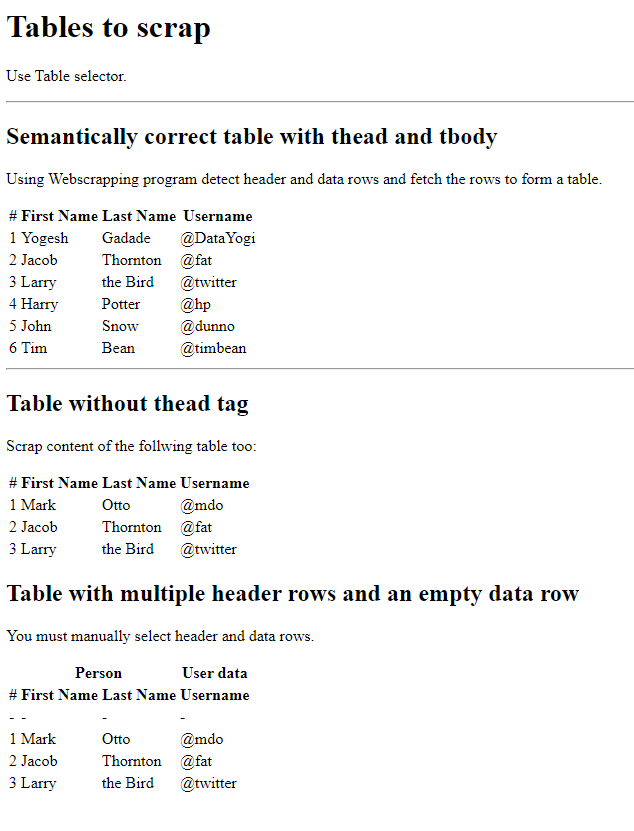

## Table 1 in sample HTML code looks like this:
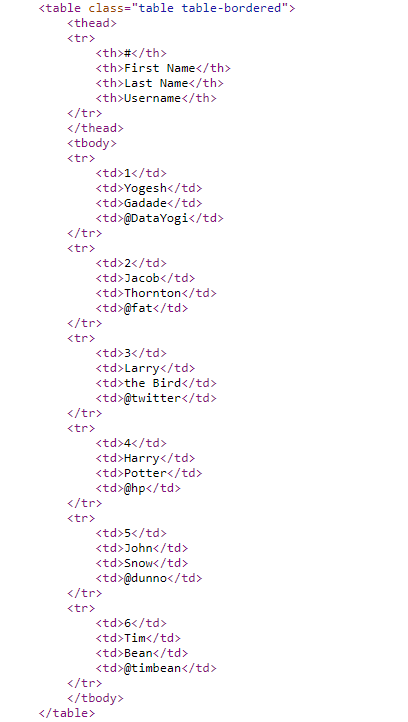

<a id='beautifulSoup'></a>
# 2. Exploring features of BeautifulSoup

In [2]:
# Open HTML file. Read the content.
HtmlFile = open('WebpageWithTable.html', 'r')
html_source_code = HtmlFile.read() 
HtmlFile.close()

In [3]:
html_source_code

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\n\t<title>Yogesh Web Scraper Test Sites</title>\n\n\t\n</head>\n<body>\n<header role="banner" class="navbar navbar-fixed-top navbar-static">\n</header>\n\n<div class="wrapper">\n\t\n\t<div class="formenu-here container-fluid">\n\n\t</div>\n\t<div class="container-fluid blog-hero">\n\t\t<div class="container">\n\t\t\t<div class="row">\n\t\t\t\t<div class="col-md-12">\n\t\t\t\t\t<h1>Tables to scrap</h1>\n\t\t\t\t</div>\n\t\t\t</div>\n\t\t</div>\n\t</div>\n\n\t<div class="container">\n\n\t\t<p>\n\t\t\tUse Table selector.\n\t\t</p>\n\t\t<hr>\n\n\t\t<h2>Semantically correct table with thead and tbody</h2>\n\t\t<p>\n\t\t\tUsing Webscrapping program detect header and data rows and fetch the rows to form a table.\n\t\t</p>\n\n\t\t<table class="table table-bordered">\n\t\t\t<thead>\n\t\t\t<tr>\n\t\t\t\t<th>#</th>\n\t\t\t\t<th>First Name</th>\n\t\t\t\t<th>Last Name</th>\n\t\t\t\t<th>Username</th>\n\t\t\t</tr>\n\t\t\t</thead>\n\t\t\t<tbody>\n\t\t\t<tr>

In [4]:
soup = BeautifulSoup(html_source_code, 'html.parser') 
#Creating Beutifulsoup object. html.parser  or lxml is the html parser
#type(soup)=> bs4.BeautifulSoup 
# the soup object allows us to extract different information egarding the website/webpage
soup

<!DOCTYPE html>

<html lang="en">
<head>
<title>Yogesh Web Scraper Test Sites</title>
</head>
<body>
<header class="navbar navbar-fixed-top navbar-static" role="banner">
</header>
<div class="wrapper">
<div class="formenu-here container-fluid">
</div>
<div class="container-fluid blog-hero">
<div class="container">
<div class="row">
<div class="col-md-12">
<h1>Tables to scrap</h1>
</div>
</div>
</div>
</div>
<div class="container">
<p>
			Use Table selector.
		</p>
<hr/>
<h2>Semantically correct table with thead and tbody</h2>
<p>
			Using Webscrapping program detect header and data rows and fetch the rows to form a table.
		</p>
<table class="table table-bordered">
<thead>
<tr>
<th>#</th>
<th>First Name</th>
<th>Last Name</th>
<th>Username</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>Yogesh</td>
<td>Gadade</td>
<td>@DataYogi</td>
</tr>
<tr>
<td>2</td>
<td>Jacob</td>
<td>Thornton</td>
<td>@fat</td>
</tr>
<tr>
<td>3</td>
<td>Larry</td>
<td>the Bird</td>
<td>@twitter</td>
</tr>
<tr>
<t

In [5]:
htmltagAllReviewBlocks = soup.find_all('table', {"class": "table table-bordered"})
#Extract block containing tables 

tempTotalNumberOfReviews = len(htmltagAllReviewBlocks)
print('We have total number of tables found on this page:', tempTotalNumberOfReviews)

We have total number of tables found on this page: 3


In [6]:
htmltagAllReviewBlocks

[<table class="table table-bordered">
 <thead>
 <tr>
 <th>#</th>
 <th>First Name</th>
 <th>Last Name</th>
 <th>Username</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td>Yogesh</td>
 <td>Gadade</td>
 <td>@DataYogi</td>
 </tr>
 <tr>
 <td>2</td>
 <td>Jacob</td>
 <td>Thornton</td>
 <td>@fat</td>
 </tr>
 <tr>
 <td>3</td>
 <td>Larry</td>
 <td>the Bird</td>
 <td>@twitter</td>
 </tr>
 <tr>
 <td>4</td>
 <td>Harry</td>
 <td>Potter</td>
 <td>@hp</td>
 </tr>
 <tr>
 <td>5</td>
 <td>John</td>
 <td>Snow</td>
 <td>@dunno</td>
 </tr>
 <tr>
 <td>6</td>
 <td>Tim</td>
 <td>Bean</td>
 <td>@timbean</td>
 </tr>
 </tbody>
 </table>,
 <table class="table table-bordered">
 <tbody>
 <tr>
 <th>#</th>
 <th>First Name</th>
 <th>Last Name</th>
 <th>Username</th>
 </tr>
 <tr>
 <td>1</td>
 <td>Mark</td>
 <td>Otto</td>
 <td>@mdo</td>
 </tr>
 <tr>
 <td>2</td>
 <td>Jacob</td>
 <td>Thornton</td>
 <td>@fat</td>
 </tr>
 <tr>
 <td>3</td>
 <td>Larry</td>
 <td>the Bird</td>
 <td>@twitter</td>
 </tr>
 </tbody>
 </table>,
 

In [7]:
pgTitleName = soup.title.text
print(f"Page title is: {pgTitleName}")

Page title is: Yogesh Web Scraper Test Sites


In [8]:
# all tables
len(htmltagAllReviewBlocks)

3

In [9]:
html_table = htmltagAllReviewBlocks[0] # Extract table 1

In [10]:
html_table

<table class="table table-bordered">
<thead>
<tr>
<th>#</th>
<th>First Name</th>
<th>Last Name</th>
<th>Username</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>Yogesh</td>
<td>Gadade</td>
<td>@DataYogi</td>
</tr>
<tr>
<td>2</td>
<td>Jacob</td>
<td>Thornton</td>
<td>@fat</td>
</tr>
<tr>
<td>3</td>
<td>Larry</td>
<td>the Bird</td>
<td>@twitter</td>
</tr>
<tr>
<td>4</td>
<td>Harry</td>
<td>Potter</td>
<td>@hp</td>
</tr>
<tr>
<td>5</td>
<td>John</td>
<td>Snow</td>
<td>@dunno</td>
</tr>
<tr>
<td>6</td>
<td>Tim</td>
<td>Bean</td>
<td>@timbean</td>
</tr>
</tbody>
</table>

In [11]:
# access body section of each table. filter out header.
tbody = htmltagAllReviewBlocks[0].find_all('tbody')
tbody

[<tbody>
 <tr>
 <td>1</td>
 <td>Yogesh</td>
 <td>Gadade</td>
 <td>@DataYogi</td>
 </tr>
 <tr>
 <td>2</td>
 <td>Jacob</td>
 <td>Thornton</td>
 <td>@fat</td>
 </tr>
 <tr>
 <td>3</td>
 <td>Larry</td>
 <td>the Bird</td>
 <td>@twitter</td>
 </tr>
 <tr>
 <td>4</td>
 <td>Harry</td>
 <td>Potter</td>
 <td>@hp</td>
 </tr>
 <tr>
 <td>5</td>
 <td>John</td>
 <td>Snow</td>
 <td>@dunno</td>
 </tr>
 <tr>
 <td>6</td>
 <td>Tim</td>
 <td>Bean</td>
 <td>@timbean</td>
 </tr>
 </tbody>]

In [12]:
intNumOfRows = len(tbody[0].find_all('tr'))

In [13]:
tdAllRows = tbody[0].find_all('td')
tdAllRows

[<td>1</td>,
 <td>Yogesh</td>,
 <td>Gadade</td>,
 <td>@DataYogi</td>,
 <td>2</td>,
 <td>Jacob</td>,
 <td>Thornton</td>,
 <td>@fat</td>,
 <td>3</td>,
 <td>Larry</td>,
 <td>the Bird</td>,
 <td>@twitter</td>,
 <td>4</td>,
 <td>Harry</td>,
 <td>Potter</td>,
 <td>@hp</td>,
 <td>5</td>,
 <td>John</td>,
 <td>Snow</td>,
 <td>@dunno</td>,
 <td>6</td>,
 <td>Tim</td>,
 <td>Bean</td>,
 <td>@timbean</td>]

In [14]:
for row in tdAllRows:
    print(row.text)

1
Yogesh
Gadade
@DataYogi
2
Jacob
Thornton
@fat
3
Larry
the Bird
@twitter
4
Harry
Potter
@hp
5
John
Snow
@dunno
6
Tim
Bean
@timbean


In [15]:
DataFrame(tdAllRows) # if created dataframe directly we get. ( not desired output )

,0
0,1
1,Yogesh
...,...
22,Bean
23,@timbean


<a id='pandas'></a>

# Exploring Pandas (html_read) to read the HTML file and create the tables 

In [16]:
url = 'WebpageWithTable.html'
lstAllTables = read_html(url)
lstAllTables

[    # First Name Last Name   Username
 0   1     Yogesh    Gadade  @DataYogi
 1   2      Jacob  Thornton       @fat
 .. ..        ...       ...        ...
 4   5       John      Snow     @dunno
 5   6        Tim      Bean   @timbean
 
 [6 rows x 4 columns],
    # First Name Last Name  Username
 0  1       Mark      Otto      @mdo
 1  2      Jacob  Thornton      @fat
 2  3      Larry  the Bird  @twitter,
   Unnamed: 0_level_0     Person           User data
                    # First Name Last Name  Username
 0                  -          -         -         -
 1                  1       Mark      Otto      @mdo
 2                  2      Jacob  Thornton      @fat
 3                  3      Larry  the Bird  @twitter]

In [17]:
pdTable1 = lstAllTables[0]
pdTable2 = lstAllTables[1]
pdTable3 = lstAllTables[2]

In [18]:
pdTable1

,#,First Name,Last Name,Username
0,1,Yogesh,Gadade,@DataYogi
1,2,Jacob,Thornton,@fat
...,...,...,...,...
4,5,John,Snow,@dunno
5,6,Tim,Bean,@timbean


In [19]:
pdTable2

,#,First Name,Last Name,Username
0,1,Mark,Otto,@mdo
1,2,Jacob,Thornton,@fat
2,3,Larry,the Bird,@twitter


In [20]:
pdTable3

Unnamed: 0_level_0     Person           User data
                   # First Name Last Name  Username
0                  -          -         -         -
1                  1       Mark      Otto      @mdo
2                  2      Jacob  Thornton      @fat
3                  3      Larry  the Bird  @twitter

# Try to Read tables on the webpage directly

### Let's read simple table directly from the website
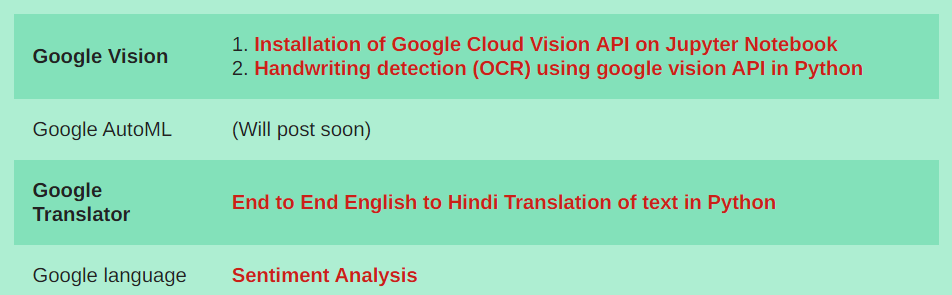

In [21]:
tables = read_html('https://limitlessdatascience.wordpress.com/deep-learning/')
print('Tables found:', len(tables))  
tables[0]

Tables found: 1


,0,1
0,Google Vision,1. Installation of Google Cloud Visi...
1,Google AutoML,(Will post soon)
2,Google Translator,End to End English to Hindi Translat...
3,Google language,Sentiment Analysis


### Let's ty to read more complex webppage containing multiple tables

In [22]:
tables = read_html('https://en.wikipedia.org/wiki/Python_(programming_language)')
print('Tables found:', len(tables))  

Tables found: 13


In [23]:
tables[0] # Display table 1

,0,1
0,NaN,NaN
1,Paradigm,"Multi-paradigm: object-oriented,[1] ..."
...,...,...
19,"Apache Groovy, Boo, Cobra, CoffeeScr...","Apache Groovy, Boo, Cobra, CoffeeScr..."
20,Python Programming at Wikibooks,Python Programming at Wikibooks


In [24]:
tables[1] # Display table 2

,Type,Mutability,Description,Syntax examples
0,bool,immutable,Boolean value,TrueFalse
1,bytearray,mutable,Sequence of bytes,"bytearray(b'Some ASCII')bytearray(b""..."
...,...,...,...,...
14,str,immutable,A character string: sequence of Unic...,"'Wikipedia'""Wikipedia""""""""Spanning mu..."
15,tuple,immutable,Can contain mixed types,"(4.0, 'string', True)('single elemen..."


In [25]:
tables[2]

,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vtePython",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vtePython.1",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}vtePython.2"
0,Implementations,CircuitPython CLPython CPython Cytho...,NaN
1,IDE,Boa Eric Python IDE IDLE PyCharm PyD...,NaN
2,Topics,WSGI,NaN
3,software (list) Python Software Foun...,software (list) Python Software Foun...,software (list) Python Software Foun...


In [26]:
tables[3]

,vteProgramming languages,vteProgramming languages.1
0,Comparison Timeline History,Comparison Timeline History
1,Ada ALGOL APL Assembly BASIC C C++ C...,Ada ALGOL APL Assembly BASIC C C++ C...
2,Category Lists: Alphabetical Catego...,Category Lists: Alphabetical Catego...


In [27]:
tables[4]

,vtePython web frameworks,vtePython web frameworks.1
0,Bottle CherryPy CubicWeb Django Fast...,Bottle CherryPy CubicWeb Django Fast...


<a id='requests'></a>

# Exploring requests get call- Authentication requirement

### Reading HTML data from URL requires authentication

- When the site requires authentication, the code runs into the following exception:
    - raise HTTPError(req.full_url, code, msg, hdrs, fp) urllib.error.HTTPError: HTTP Error 401: UNAUTHORIZED
- To read data from such URLs can use the requests module. 
- You can install it with pip: ! pip install requests
- Use the get() method from the requests library to make a request to a website URL while providing the optional auth parameter if the site requires authentication.

In [28]:
%time response = get('https://en.wikipedia.org/wiki/Python_(programming_language)')
print(response) # <Response [200]> shows success

Wall time: 939 ms
<Response [200]>


In [29]:
# printing content
response.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Python (programming language) - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c0d9a525-c939-4094-9b8f-b6a3c43b694e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Python_(programming_language)","wgTitle":"Python (programming language)","wgCurRevisionId":1031165903,"wgRevisionId":1031165903,"wgArticleId":23862,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from June 2021","Articles with short desc

In [30]:
lstTables=read_html(response.text)
print('Tables found:', len(lstTables)) 

Tables found: 13


In [31]:
type(lstTables)

list

In [32]:
lstTables[1]

,Type,Mutability,Description,Syntax examples
0,bool,immutable,Boolean value,TrueFalse
1,bytearray,mutable,Sequence of bytes,"bytearray(b'Some ASCII')bytearray(b""..."
...,...,...,...,...
14,str,immutable,A character string: sequence of Unic...,"'Wikipedia'""Wikipedia""""""""Spanning mu..."
15,tuple,immutable,Can contain mixed types,"(4.0, 'string', True)('single elemen..."


To use **authentication** feature of requests pass two additional arguments in the get request: username and password as follows:

get('url', 'username', 'password')

<a id='urlopen'></a>
# Exploring urllib.request's function urlopen
- Python’s standard library is urllib, which contains tools for working with URLs. In particular, the urllib.request module contains a function called urlopen() that can be used to open a URL within a program.

In [33]:
%time response = urlopen('https://en.wikipedia.org/wiki/Python_(programming_language)')
print(response) # <Response [200]> shows success

Wall time: 463 ms


In [34]:
type(response)

http.client.HTTPResponse

In [35]:
# Therefore parse it first
soup = BeautifulSoup(response, 'lxml') 

In [36]:
response1 = soup.text
response1

'\n\n\nPython (programming language) - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPython (programming language)\n\nFrom Wikipedia, the free encyclopedia\n\n\n\nJump to navigation\nJump to search\nGeneral-purpose, high-level programming language\n\n\nFor other uses, see Python (disambiguation).\nPythonParadigmMulti-paradigm: object-oriented,[1] procedural (imperative), functional, structured, reflectiveDesigned\xa0byGuido van RossumDeveloperPython Software FoundationFirst\xa0appearedFebruary\xa01991; 30\xa0years ago\xa0(1991-02)[2]Stable release3.9.6[3]\xa0\n   / 28 June 2021; 2 days ago\xa0(28 June 2021)\nTyping disciplineDuck, dynamic, strong typing;[4] gradual (since 3.5, but ignored in CPython)[5]OSWindows, Linux/UNIX, macOS and more[6]LicensePython Software Foundation LicenseFilename extensions.py, .pyi, .pyc, .pyd, .pyo (prior to 3.5),[7] .pyw, .pyz (since 3.5)[8]Websitewww.python.orgMajor implementationsCPython, PyPy, Stackless Python, MicroPytho

lstTables=read_html(response1)             # This will not work in this case it displays: ValueError: No tables found
print('Tables found:', len(lstTables)) 

In [37]:
%time response = urlopen('https://en.wikipedia.org/wiki/Python_(programming_language)')
response2 = response.readlines()
response2

Wall time: 479 ms


[b'<!DOCTYPE html>\n',
 b'<html class="client-nojs" lang="en" dir="ltr">\n',
 b'<head>\n',
 b'<meta charset="UTF-8"/>\n',
 b'<title>Python (programming language) - Wikipedia</title>\n',
 b'<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c0d9a525-c939-4094-9b8f-b6a3c43b694e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Python_(programming_language)","wgTitle":"Python (programming language)","wgCurRevisionId":1031165903,"wgRevisionId":1031165903,"wgArticleId":23862,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from June

In [38]:
type(response2)

list

lstTables=read_html(response1)          # This will not work in this case it displays: ValueError: No tables found
print('Tables found:', len(lstTables)) 

<a id='ToHTML'></a>
# Write Pandas DataFrame in an HTML file
- The **to_html()** takes the path of the file you want the data exported to. If you don't provide an absolute path, it would save a file relative to the current directory.

In [39]:
#Create new HTML page and export a DataFrame to an HTML table:
lstTables[1].to_html("ExportingDataToNewHTML.html")

### HTML output looks like this:
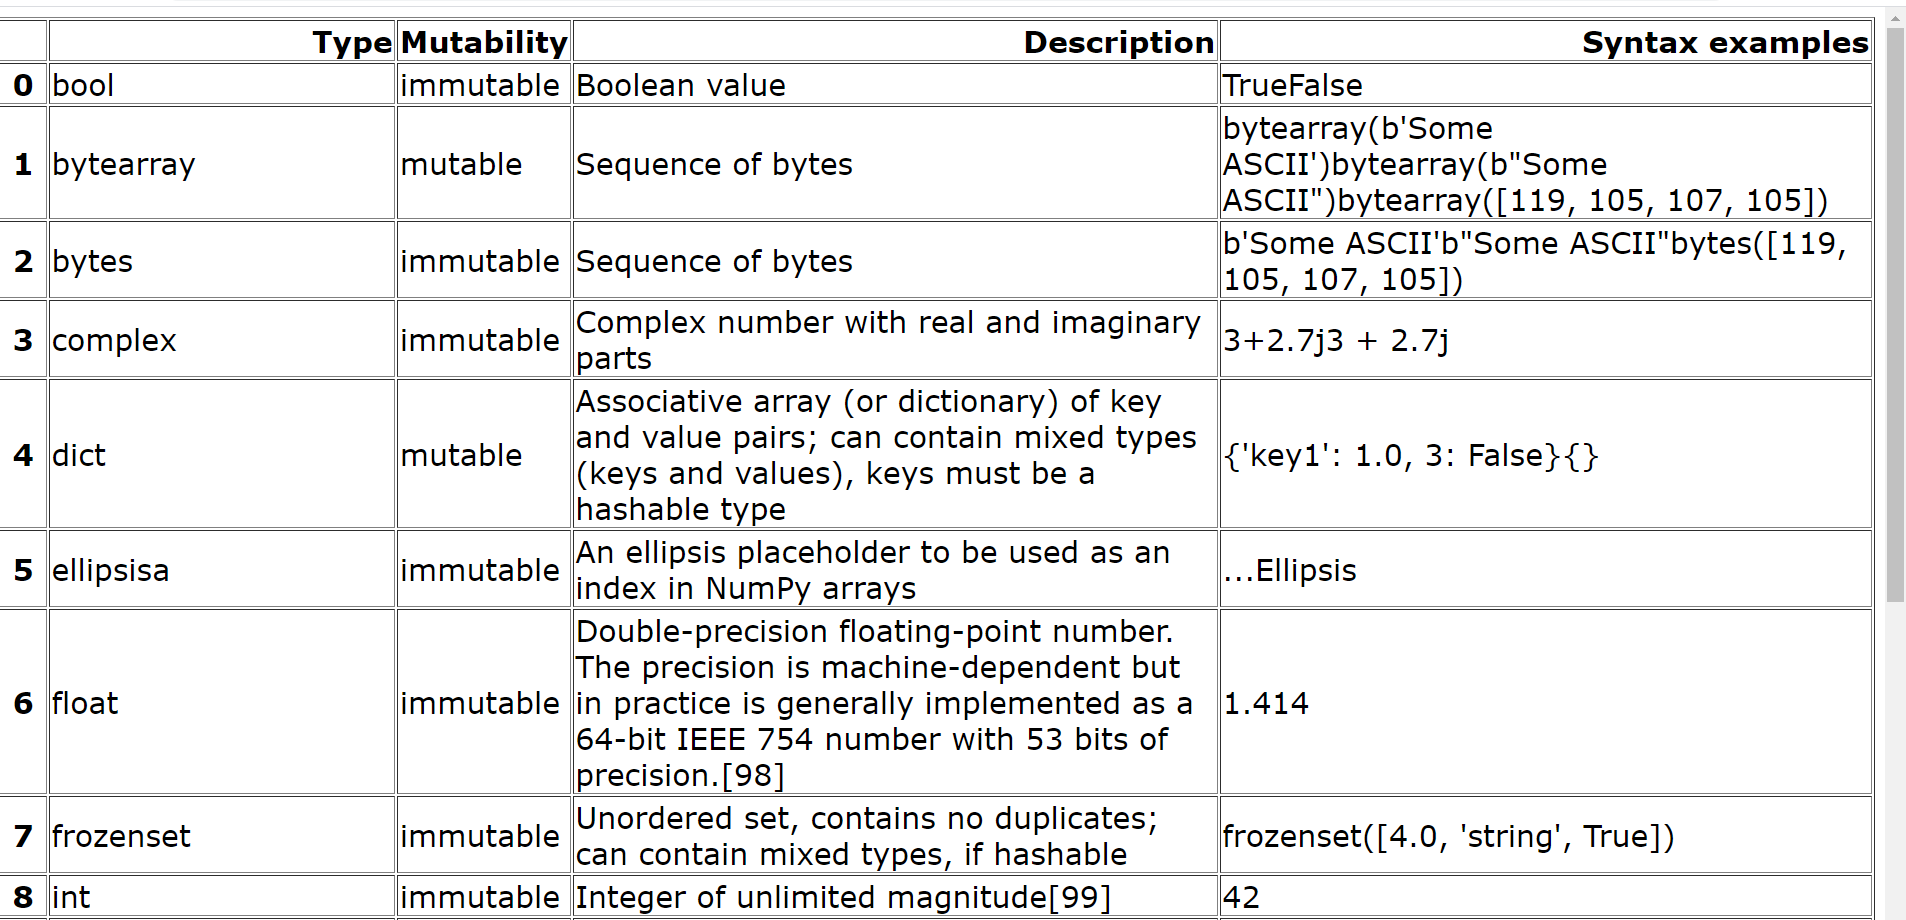

In [40]:
Output = read_html("ExportingDataToNewHTML.html")
Output[0]

,Unnamed: 0,Type,Mutability,Description,Syntax examples
0,0,bool,immutable,Boolean value,TrueFalse
1,1,bytearray,mutable,Sequence of bytes,"bytearray(b'Some ASCII')bytearray(b""..."
...,...,...,...,...,...
14,14,str,immutable,A character string: sequence of Unic...,"'Wikipedia'""Wikipedia""""""""Spanning mu..."
15,15,tuple,immutable,Can contain mixed types,"(4.0, 'string', True)('single elemen..."


<a id='openActions'></a>
# Open action items (that can be done):
1. Store list of tables into the html
2. Write another table into the same HTML file
3. Create table from the urlopen response

<a id='ref'></a>
# References:
1. A Practical Introduction to Web Scraping in Python: https://realpython.com/python-web-scraping-practical-introduction/
2. Reading and Writing HTML Tables with Pandas: https://stackabuse.com/reading-and-writing-html-tables-with-pandas 